 # Project Applied Data Analysis. 

###### Module 2 of the Applied Machine Learning Program. EPFL Ext School. EPFL, Certificate of Open Studies. 

In this project, I will work with the "Open Food Facts" dataset from Kaggle. The data is available under the license Open Database License.

This is a data set of food products listing the ingredients and nutritional facts of more than 300,000 foods from over 150 countries in the world.
The data is meant to be free to the public to help users decode food labels, and make better food choices in general.

The data set is very messy and the goal of this project is to get the data in the best shape possible for analysis. 

In [1]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 2000)
pd.options.mode.chained_assignment = None

import numpy as np
from numpy import median
import scipy.stats as stats

import sqlite3

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns
from matplotlib import pyplot as plt

import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

##### A. Importing and cleaning the data

In [2]:
data = pd.read_csv('en.openfoodfacts.org.products.tsv',sep='\t', low_memory=False)

In [3]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

Exploring the number of rows that are not null or empty values for each column. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


We have 163 columns in our dataframe. 107 type float and 56 object (Strings)

In [5]:
data.count()

code                                          356001
url                                           356001
creator                                       356024
created_t                                     356024
created_datetime                              356017
last_modified_t                               356027
last_modified_datetime                        356027
product_name                                  338515
generic_name                                   57714
quantity                                      119285
packaging                                      89959
packaging_tags                                 89959
brands                                        326977
brands_tags                                   326957
categories                                    103299
categories_tags                               103275
categories_en                                 103301
origins                                        25050
origins_tags                                  

There are some columns that are totaly empty or more than 75% of the rows are null values. 

I will create a copy of the original data, called "df". I will clean the data in the copy.

In [6]:
df = data.copy()

Drop all the columns that have "null" or empty values in 75% their rows.

In [7]:
df.dropna(axis=1, thresh= len(data)*0.25, how="all", inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 52 columns):
code                                       356001 non-null object
url                                        356001 non-null object
creator                                    356024 non-null object
created_t                                  356024 non-null object
created_datetime                           356017 non-null object
last_modified_t                            356027 non-null object
last_modified_datetime                     356027 non-null object
product_name                               338515 non-null object
quantity                                   119285 non-null object
packaging                                  89959 non-null object
packaging_tags                             89959 non-null object
brands                                     326977 non-null object
brands_tags                                326957 non-null object
categories                       

The number of "null" values that still remind in my data by column are: 

In [9]:
df.isnull().sum()

code                                           26
url                                            26
creator                                         3
created_t                                       3
created_datetime                               10
last_modified_t                                 0
last_modified_datetime                          0
product_name                                17512
quantity                                   236742
packaging                                  266068
packaging_tags                             266068
brands                                      29050
brands_tags                                 29070
categories                                 252728
categories_tags                            252752
categories_en                              252726
countries                                     275
countries_tags                                275
countries_en                                  275
ingredients_text                            72134


I will delete the columns that I consider are not useful for my analysis.

In [10]:
df = df.drop(['url','creator','created_t','countries','countries_tags','last_modified_t','states','states_en','states_tags'], axis=1)

In [11]:
# df.info()

Number of duplicates rows in my data. 

In [12]:
df.duplicated().sum()

0

Data type by column. 

I will check if all the data types correspond to the name of the columns.

In [13]:
df.dtypes

code                                        object
created_datetime                            object
last_modified_datetime                      object
product_name                                object
quantity                                    object
packaging                                   object
packaging_tags                              object
brands                                      object
brands_tags                                 object
categories                                  object
categories_tags                             object
categories_en                               object
countries_en                                object
ingredients_text                            object
serving_size                                object
additives_n                                float64
additives                                   object
additives_tags                              object
additives_en                                object
ingredients_from_palm_oil_n    

Correction of data type for some columns. 

In [14]:
df['created_datetime'] = pd.to_datetime(df['created_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

In [15]:
df['last_modified_datetime'] = pd.to_datetime(df['last_modified_datetime'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

Unique values in the "Countries_en" column. 

In [16]:
df['countries_en'].nunique()

779

I want to see if in the column "Countries_en" each unique value corresponds to one country.

In [17]:
df['countries_en'].unique().tolist() # List of strings

['France',
 'United States',
 'United Kingdom',
 'France,United States',
 'Canada',
 'Switzerland',
 'Spain',
 'Germany',
 'Slovenia',
 'Bangladesh',
 'Italy',
 'Romania',
 'Australia',
 'Portugal',
 'France,United Kingdom',
 'Belgium,France,Netherlands,United Kingdom',
 'Guadeloupe',
 'United Kingdom,United States',
 'Dominican Republic',
 'Canada,United States',
 'Netherlands',
 'Australia,France',
 'Canada,France,Switzerland,United States',
 'Ireland',
 'France,Réunion',
 'Taiwan',
 'Australia,Belgium,Switzerland',
 'France,Germany',
 'Brazil',
 'Belgium,France',
 'Australia,United States',
 'Mexico',
 'Saudi Arabia',
 'United Arab Emirates',
 'Iraq',
 'Kuwait',
 'Moldova',
 'France,Iraq',
 'New Caledonia',
 nan,
 'Singapore',
 'Finland',
 'Sweden,United States',
 'French Polynesia',
 'France,Switzerland',
 'Australia,New Zealand,Singapore,Thailand,United States',
 'France,French Polynesia',
 'Panama',
 'Costa Rica',
 'Netherlands,United States',
 'France,Netherlands',
 'Spain,Unite

Some countries have more than one unique value or some countries are grouped. 

I will split the column "Countries_en" to be easier to read it and to have one unique value by country. Before the split, I will create a new copy.  

In [18]:
df_a = df.copy() 

In [19]:
split_countries = df_a['countries_en'].str.split(',').str[0]
df_a['countries_en'] = split_countries
df_a['countries_en'].unique().tolist()

['France',
 'United States',
 'United Kingdom',
 'Canada',
 'Switzerland',
 'Spain',
 'Germany',
 'Slovenia',
 'Bangladesh',
 'Italy',
 'Romania',
 'Australia',
 'Portugal',
 'Belgium',
 'Guadeloupe',
 'Dominican Republic',
 'Netherlands',
 'Ireland',
 'Taiwan',
 'Brazil',
 'Mexico',
 'Saudi Arabia',
 'United Arab Emirates',
 'Iraq',
 'Kuwait',
 'Moldova',
 'New Caledonia',
 nan,
 'Singapore',
 'Finland',
 'Sweden',
 'French Polynesia',
 'Panama',
 'Costa Rica',
 'Trinidad and Tobago',
 'Thailand',
 'China',
 'Hong Kong',
 'Luxembourg',
 'Lebanon',
 'Denmark',
 'Malaysia',
 'Guyana',
 'Serbia',
 'Martinique',
 'Barbados',
 'Aruba',
 'Norway',
 'Haiti',
 'El Salvador',
 'Bahrain',
 'Guatemala',
 'Réunion',
 'Morocco',
 'Oman',
 'South Korea',
 'Chile',
 'Cuba',
 'Japan',
 'Israel',
 'Philippines',
 'United-states-of-america',
 'Austria',
 'Guinea',
 'Jordan',
 'Russia',
 'Saint Pierre and Miquelon',
 'Algeria',
 'fr:Quebec',
 'Czech Republic',
 'Mauritius',
 'Indonesia',
 'Armenia',
 "C

Controlling how many unique values we have in the column "countries_en" after the split and the data type of each column.

In [20]:
df_a['countries_en'].nunique()

187

Now the information in the column looks clearer and we have 187 unique values. 

I will repeat the process with the column 'categories_en'.

In [21]:
df_a['categories_en'].nunique()

24112

In [22]:
split_categiories = df_a['categories_en'].str.split(',').str[0]
df_a['categories_en'] = split_categiories
df_a['categories_en'].unique().tolist()

[nan,
 'fr:Filet-de-boeuf',
 'Plant-based foods and beverages',
 'Sugary snacks',
 'fr:Boulange',
 'Beverages',
 'Meals',
 'Meats',
 'Syrups',
 'Chicken-feet',
 'Desserts',
 'Groceries',
 'Dietary supplements',
 'Chips and fries',
 'Fish and meat and eggs',
 'fr:Pate-au-foie-de-canard',
 'Terrine',
 'Dairies',
 'Spreads',
 'Breakfasts',
 'Carrot-coriander-soup',
 'Scottish-shortbread',
 'Charcuteries',
 'Salty snacks',
 'Tuna-steaks',
 'Sandwiches',
 'Pear-and-blackcurrant-juice',
 'Crêpes and galettes',
 'Harengs',
 'it:Vinaigre-balsamique',
 'Fats',
 'Parve',
 'Pickles',
 'Canned foods',
 'Lindt-sea-salt-chocolate',
 'Pates-a-tartiner-aux-noisettes-et-au-cacao',
 'Fresh foods',
 'Salad',
 'Hoisin-sauce',
 'Pumpkin-seed-pecan',
 'Rice-candy',
 'Frozen foods',
 'Pies',
 'fr:Sauce-aux-piments',
 'Vanilla-soymilk',
 'Diet-colas',
 'Tea-drinks',
 'Sweeteners',
 'Caramel-popcorn',
 'Semolina',
 'Eau-de-vie',
 'Baked-beans',
 'Seafood',
 'Barbeque-sauce',
 'Cinnamon-raisin-bagels',
 'Snacks

In [23]:
df_a['categories_en'].nunique()

3643

After split the column 'categories_en' the number of unique values went from 24,112 to 3,643, but the values still need to be clean. There are some values that are the same ingredient but in the different language or special characters. I will create a function that helps to clean the column. 

In [24]:
def clean_points(ls):
    ls=ls.str.replace('-',' ')
    ls=ls.str.replace('fr:','')
    ls=ls.str.replace('de:','')
    ls=ls.str.replace('es:','')
    ls=ls.str.replace('pl:','')
    ls=ls.str.replace('it:','')
    ls=ls.str.replace('pt:','')
    ls=ls.str.replace('el:','')
    ls=ls.str.replace('xx:','')
    ls=ls.str.replace('ro:','')
    ls=ls.str.replace('nl:','')
    ls=ls.str.replace('he:','')
    ls=ls.str.replace('ru:','')
    ls=ls.str.replace('zh:','')
    ls=ls.str.replace('ja:','')
    ls=ls.str.replace('Huile olive vierge extra','Oil')
    ls=ls.str.replace('Huile d olive extra vierge','Oil')  
    ls=ls.str.replace('olive oils','Oil')   
    ls=ls.str.replace('Azeite','Oil')
    ls=ls.str.replace('Azeites','Oil')
    ls=ls.str.replace('Olive oils','Oil')
    ls=ls.str.replace('Huiles','Oil')
    ls=ls.str.replace('Fats','Oil')
    ls=ls.str.replace('Sunflower oil spread','Oil')
    ls=ls.str.replace('Άρτυμα εξαιρετικού παρθένου ελαιόλαδου','Oil')
    ls=ls.str.replace('Black truffle oil','Oil')
    ls=ls.str.replace('Oil oil','Oil')
    ls=ls.str.replace('Oil de cameline','Oil')
    ls=ls.str.replace('Oils','Oil')
    ls=ls.str.replace('Oil oil','Oil')
    ls=ls.str.replace('Distelol','Oil')
    ls=ls.str.replace('Mct','Oil')
    ls=ls.str.replace('Coconut oil','Oil')    
    ls=ls.str.replace('Aceite de coco','Oil')
    ls=ls.str.replace('Huile pour wok','Oil')   
    ls=ls.str.replace('Butterschmalz','Butter')
    ls=ls.str.replace('Goat milk butter','Butter')
    ls=ls.str.replace('Goats butter','Butter')
    ls=ls.str.replace('Mantegia','Butter')
    ls=ls.str.replace('Burro','Butter')
    ls=ls.str.replace('Beurre et huile d olive','Butter')    
    ls=ls.str.replace('Clarified butter','Butter')
    ls=ls.str.replace('Unsalted butter','Butter')    
    ls=ls.str.replace('Mayonnaise en tube','Mayonnaise')
    ls=ls.str.replace('Mayonnaises fraiches','Mayonnaise')
    ls=ls.str.replace('Mayonnaise en bouteille','Mayonnaise')
    ls=ls.str.replace('Mayonnaise a l huile d olive','Mayonnaise')
    ls=ls.str.replace('Majonez','Mayonnaise')
    ls=ls.str.replace('Margarina','Margarine')
    ls=ls.str.replace('Margaryna','Margarine')
    ls=ls.str.replace('Margarine huile olive','Margarine')
    ls=ls.str.replace('Magarines','Margarine')
    ls=ls.str.replace('Halvas','Halva')
    ls=ls.str.replace('Helva','Halva')
    ls=ls.str.replace('Snacks salees','Salty snacks')
    ls=ls.str.replace('fr:Demonte-italie','Italy')
    ls=ls.str.replace('Demonte italie','Italy')
    ls=ls.str.replace('fr:Quebec','Canada')
    ls=ls.str.replace('中华人民共和国','China')
    ls=ls.str.replace('Republique-de-chine','China')
    ls=ls.str.replace('Republique de chine','China')
    ls=ls.str.replace('Nederland','Netherlands')
    ls=ls.str.replace('Quebec','Canada')
    ls=ls.str.replace('Belgie','Belgium')
    ls=ls.str.replace('سلطنة-عمان','Oman')
    ls=ls.str.replace('سلطنة عمان','Oman') 
    ls=ls.str.replace('السعودية','Saudi Arabia')
    ls=ls.str.replace('(','')
    ls=ls.str.replace(')','')
    ls=ls.str.replace('•','')
    ls=ls.str.replace('\%','')
    ls=ls.str.replace('\*','')
    ls=ls.str.replace('.','')
    ls=ls.str.replace('\[','')
    ls=ls.str.replace('\]','')
    ls=ls.str.replace('\-','')
    ls=ls.str.replace('\:','')
    ls=ls.str.replace('_',' ')
    ls=ls.str.replace('—',' ')
    ls=ls.str.replace('}','')
    ls=ls.str.replace('{','')
    ls=ls.str.replace('\/',' ')
    ls=ls.str.replace('\+','')
    ls=ls.str.replace('\!','')
    ls=ls.str.replace('\'','')
    ls=ls.str.replace('\?','')
    ls=ls.str.replace('‘«?','')
    ls=ls.str.replace('org','')
    ls=ls.str.replace('organic','')
    ls=ls.str.replace('Organic','')
    ls=ls.str.replace('bananas','Bananas')
    ls=ls.str.replace('sucre','Sugar')
    ls=ls.str.replace('sugar','Sugar')
    ls=ls.str.replace('eau','Water')
    ls=ls.str.replace('water','Water')
    ls=ls.str.replace('Water','Water')
    ls=ls.str.replace('arôme','arômes')
    ls=ls.str.replace('arômess','arômes')
    ls=ls.str.replace('sel','salt')
    ls=ls.str.replace('beurre de cacao','cocoa butter')
    ls=ls.str.replace('garlic powder','garlic')
    
    for i in range(2):
        a = 0 
      
    return ls

In [25]:
cat_test = df_a.categories_en
categories = clean_points(cat_test)

cat_test2 = df_a.countries_en
countries = clean_points(cat_test2)

# Set the changes in the original DataFrame

df_a.categories_en = categories
df_a.countries_en = countries

In [26]:
#t11 = df_a[df_a['countries_en'] == 'Republique-de-chine']
#t11 = df_a[df_a['countries_en'] == 'China']
#t11 = df_a[df_a['countries_en'] == 'fr:Quebec']
#t11 = df_a[df_a['countries_en'] == '中华人民共和国']
#t11[['categories_en', 'countries_en']]

In [27]:
df_a['categories_en'].nunique()
#df_a['categories_en'].unique().tolist()

3444

## B. Manipulating the data

The goal of this point is to investigate the macronutrient breakdown across various foods (this is the percentage of calories that come from the 3 macronutrient groups: carbohydrates, protein and fats). 

- What are the foods that have the highest ratios of each macronutrient? 
- What are the foods that are most balanced? 
- What is the macronutrient breakdown across different countries? 
- Can you notice some trends or insights about the data?

I will create a new copy of my dataframe and keep with the columns that I will use for this point. 

In [28]:
df_b = df_a.copy()

In [29]:
df_b1 = df_b[['categories_en','countries_en','fat_100g','carbohydrates_100g','proteins_100g']]

df_b1.head()

,categories_en,countries_en,fat_100g,carbohydrates_100g,proteins_100g
0,NaN,France,NaN,NaN,NaN
1,NaN,United States,28.57,64.29,3.57
2,NaN,United States,17.86,60.71,17.86
3,NaN,United States,57.14,17.86,17.86
4,NaN,United States,1.43,77.14,8.57


I will start by cleaning the null values and drop the outliers in my data. 

In [30]:
df_b1.dropna(subset=['categories_en'], inplace=True)

In [31]:
df_b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103301 entries, 47 to 356023
Data columns (total 5 columns):
categories_en         103301 non-null object
countries_en          103181 non-null object
fat_100g              78301 non-null float64
carbohydrates_100g    77939 non-null float64
proteins_100g         80888 non-null float64
dtypes: float64(3), object(2)
memory usage: 4.7+ MB


In [32]:
df_b1.describe()

,fat_100g,carbohydrates_100g,proteins_100g
count,78301.000000,77939.000000,80888.00000
mean,13.485384,26.940619,7.18611
std,18.311190,27.209501,9.30619
min,0.000000,0.000000,0.00000
25%,0.800000,4.000000,1.10000
50%,5.950000,13.400000,5.40000
75%,21.000000,52.000000,10.00000
max,200.000000,165.000000,1476.00000


Looking at the information with the "describe" method, I see that there are outliers in the data. I will drop them and clean the null values.

In [33]:
df_b1 = df_b1[(df_b1['fat_100g'] + df_b1['carbohydrates_100g'] + df_b1['proteins_100g'])<=100]


# I will drop the rows where "Categories_en" be "Cuisson des aliments" as this information is ambiguous. 
df_b1 = df_b1[df_b1['categories_en']!='Cuisson des aliments']


In [34]:
def min_max_lim(df, df_column): 
    """Drop the outliers of a feature in the data-frame using the quantile function with values of min "0.01" and max "0.99"."""

    min_limite, max_limite = df_column.quantile([0.1,0.99])
    new_df = df[(df_column<=max_limite)&(df_column>=min_limite)]
    return new_df

In [35]:
df_b1 = min_max_lim(df_b1, df_b1['fat_100g'])
df_b1 = min_max_lim(df_b1, df_b1['carbohydrates_100g'])
df_b1 = min_max_lim(df_b1, df_b1['proteins_100g'])

In [36]:
df_b1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60804 entries, 176 to 356005
Data columns (total 5 columns):
categories_en         60804 non-null object
countries_en          60759 non-null object
fat_100g              60804 non-null float64
carbohydrates_100g    60804 non-null float64
proteins_100g         60804 non-null float64
dtypes: float64(3), object(2)
memory usage: 2.8+ MB


In [37]:
df_b1.dropna(subset=['countries_en'], inplace=True)

To answer the first question of "What are the foods that have the highest ratios of each macronutrient?" I will calculate the mean by categories. 

In [38]:
macro_by_categ = df_b1.groupby('categories_en').mean()

##### What are the foods that have the highest ratios of each macronutrient?

###### - Food with the highest ratio in Fat.

In [39]:
macro_fat = macro_by_categ[['fat_100g']]
macro_fat.sort_values(by='fat_100g',ascending=False).head(10)

,fat_100g
categories_en,
Butter,82.50
Sauce a l ail,81.90
Schmalz,80.00
Cremes vegetais,79.00
Mayonnaise,74.05
Pecans,71.40
Spicies,68.60
Gratons,67.00
Cocktail sauces,66.10


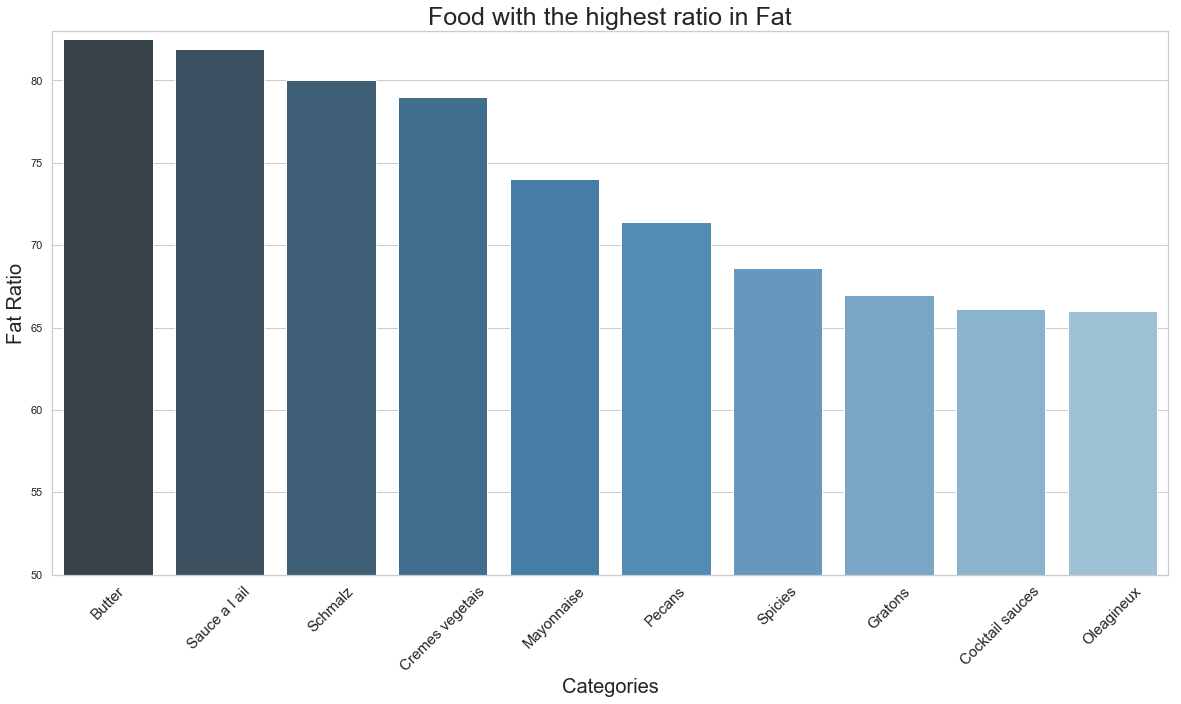

In [40]:
macro_fat.sort_values(by='fat_100g',ascending=False, inplace=True)
macro_fat20 = macro_fat.head(10)
macro_fat20.reset_index(inplace=True)

fig, ax = plt.subplots(figsize = (20,10))
ax = sns.barplot(x="categories_en", y="fat_100g", data=macro_fat20, palette="Blues_d")
plt.title("Food with the highest ratio in Fat",size = 25)
plt.xlabel('Categories',size = 20)
plt.ylabel('Fat Ratio', size = 20)
plt.ylim(50, 83)
#plt.xticks(rotation='vertical', size = 15)
plt.xticks(rotation=45, size = 15)
plt.show()

###### - Food with the highest ratio in Proteins.

In [41]:
macro_car = macro_by_categ[['carbohydrates_100g']]
macro_car.sort_values(by='carbohydrates_100g',ascending=False).head(10)

,carbohydrates_100g
categories_en,
Jelly crystals,88.7
Άμυλο αραβοσίτου σκόνη,87.5
Preparation chocolate,87.0
Extrato de malte sabor chocolate,86.7
Preparation culinaire,86.2
Chocolate sauces,85.5
Cornets,85.4
Substitut de cafe,84.6
GatWaterx de semoule,84.4


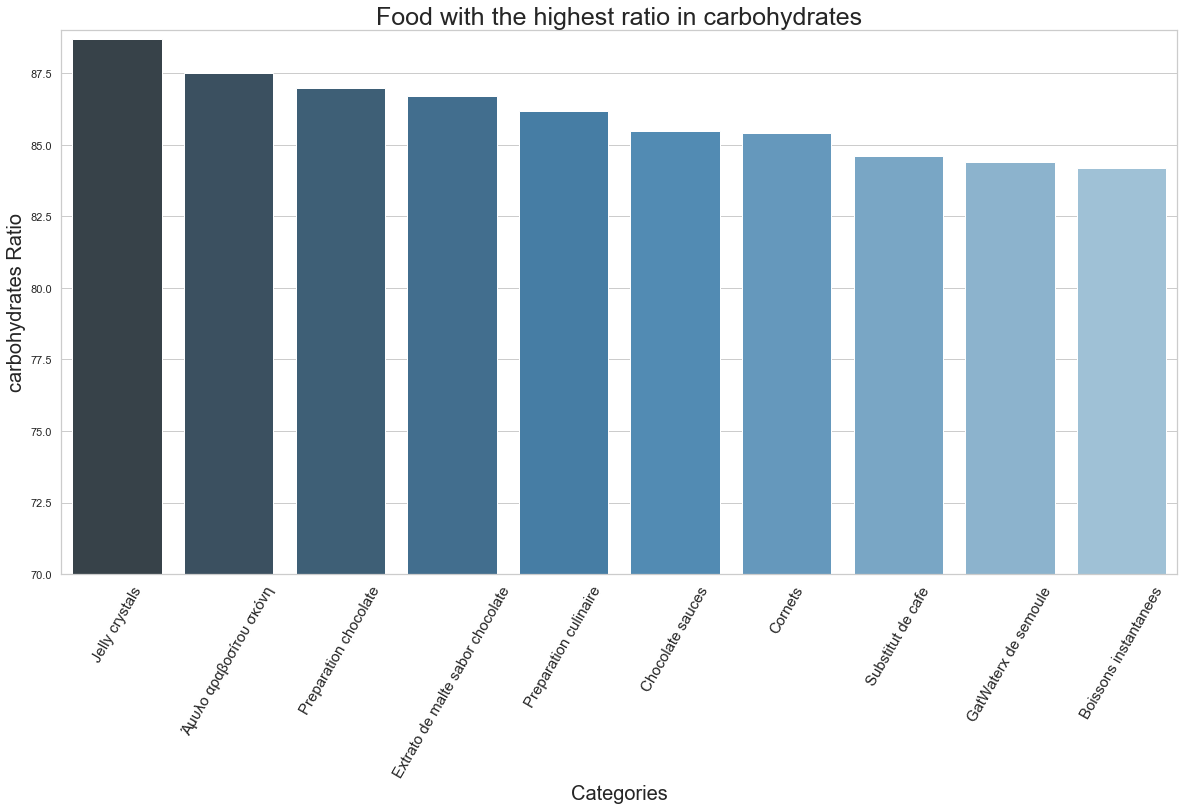

In [42]:
macro_car.sort_values(by='carbohydrates_100g',ascending=False, inplace=True)
macro_car20 = macro_car.head(10)
macro_car20.reset_index(inplace=True)

fig, ax = plt.subplots(figsize = (20,10))
#ax = sns.barplot(x="categories_en", y="carbohydrates_100g",palette="ch:.4", data=macro_car20,)
ax = sns.barplot(x="categories_en", y="carbohydrates_100g",palette="Blues_d", data=macro_car20,)
plt.title("Food with the highest ratio in carbohydrates",size = 25)
plt.xlabel('Categories', size = 20)
plt.ylabel('carbohydrates Ratio',size = 20)
plt.ylim(70, 89)
plt.xticks(rotation=60, size = 15)
plt.show()

###### - Food with the highest ratio in Proteins.

In [43]:
macro_pro = macro_by_categ[['proteins_100g']]
macro_pro.sort_values(by='proteins_100g',ascending=False).head(10)

,proteins_100g
categories_en,
Gratons,28.0
Complementos alimenticios,28.0
Oeufs de truite,27.2
Levure,27.0
Maasdam cheese,27.0
Fromage rape emmental,27.0
Paste,26.0
Arachidi,26.0
Feves,26.0


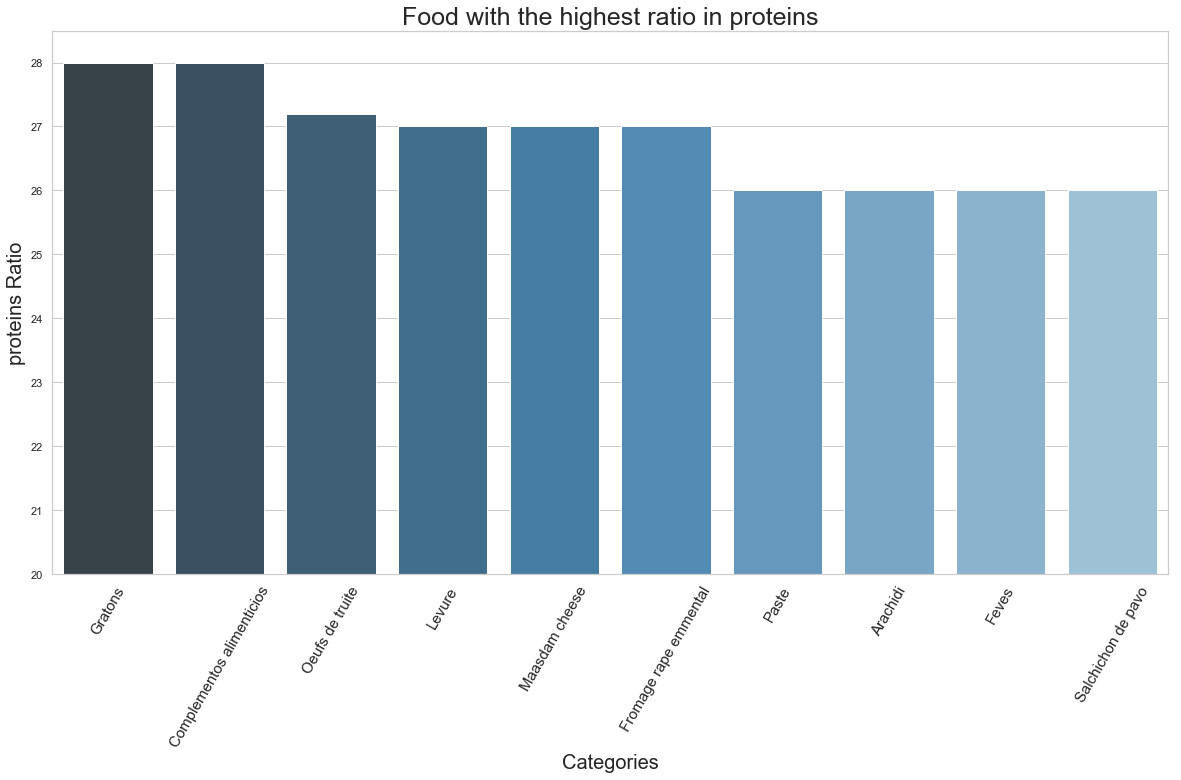

In [44]:
macro_pro.sort_values(by='proteins_100g',ascending=False, inplace=True)
macro_pro20 = macro_pro.head(10)
macro_pro20.reset_index(inplace=True)

fig, ax = plt.subplots(figsize = (20,10))
ax = sns.barplot(x="categories_en", y="proteins_100g", data=macro_pro20, palette="Blues_d")
plt.title("Food with the highest ratio in proteins", size = 25)
plt.xlabel('Categories', size = 20)
plt.ylabel('proteins Ratio', size = 20)
plt.ylim(20, 28.5)
plt.xticks(rotation=60, size = 15)
plt.show()

##### What are the foods that are most balanced? 

According to the website "https://www.healthline.com/nutrition/best-macronutrient-ratio#bottom-line", an acceptable macronutrient distribution ranges (AMDR) are 20–35% from fats, 45–65% of your daily calories from carbs and 10–35% from protein.

In [45]:
t2 = macro_by_categ
# Filter to find the most balanced food. 

t2_b = t2[(t2.fat_100g<=35)&(t2.fat_100g>=20)&(t2.carbohydrates_100g<=65)&(t2.carbohydrates_100g>=45)&(t2.proteins_100g<=35)&(t2.proteins_100g>=10)]
t2_b

,fat_100g,carbohydrates_100g,proteins_100g
categories_en,,,
Breakfast granola,20.00,63.30,10.00
Doce de amendoim,22.70,50.00,18.10
Frangipane,25.80,54.40,12.60
Fruit and nut mix,20.00,56.70,10.00
Fruit bar,21.70,45.55,10.50
Halva,33.26,49.28,12.58
Lait en poudre pour bebe,22.50,57.40,11.30
Macaron a la framboise,25.70,49.90,14.70
Powder,21.00,50.00,12.40


###### The foods that are the most balance for macronutrient are:

In [46]:
df = t2_b[['fat_100g','carbohydrates_100g','proteins_100g']]

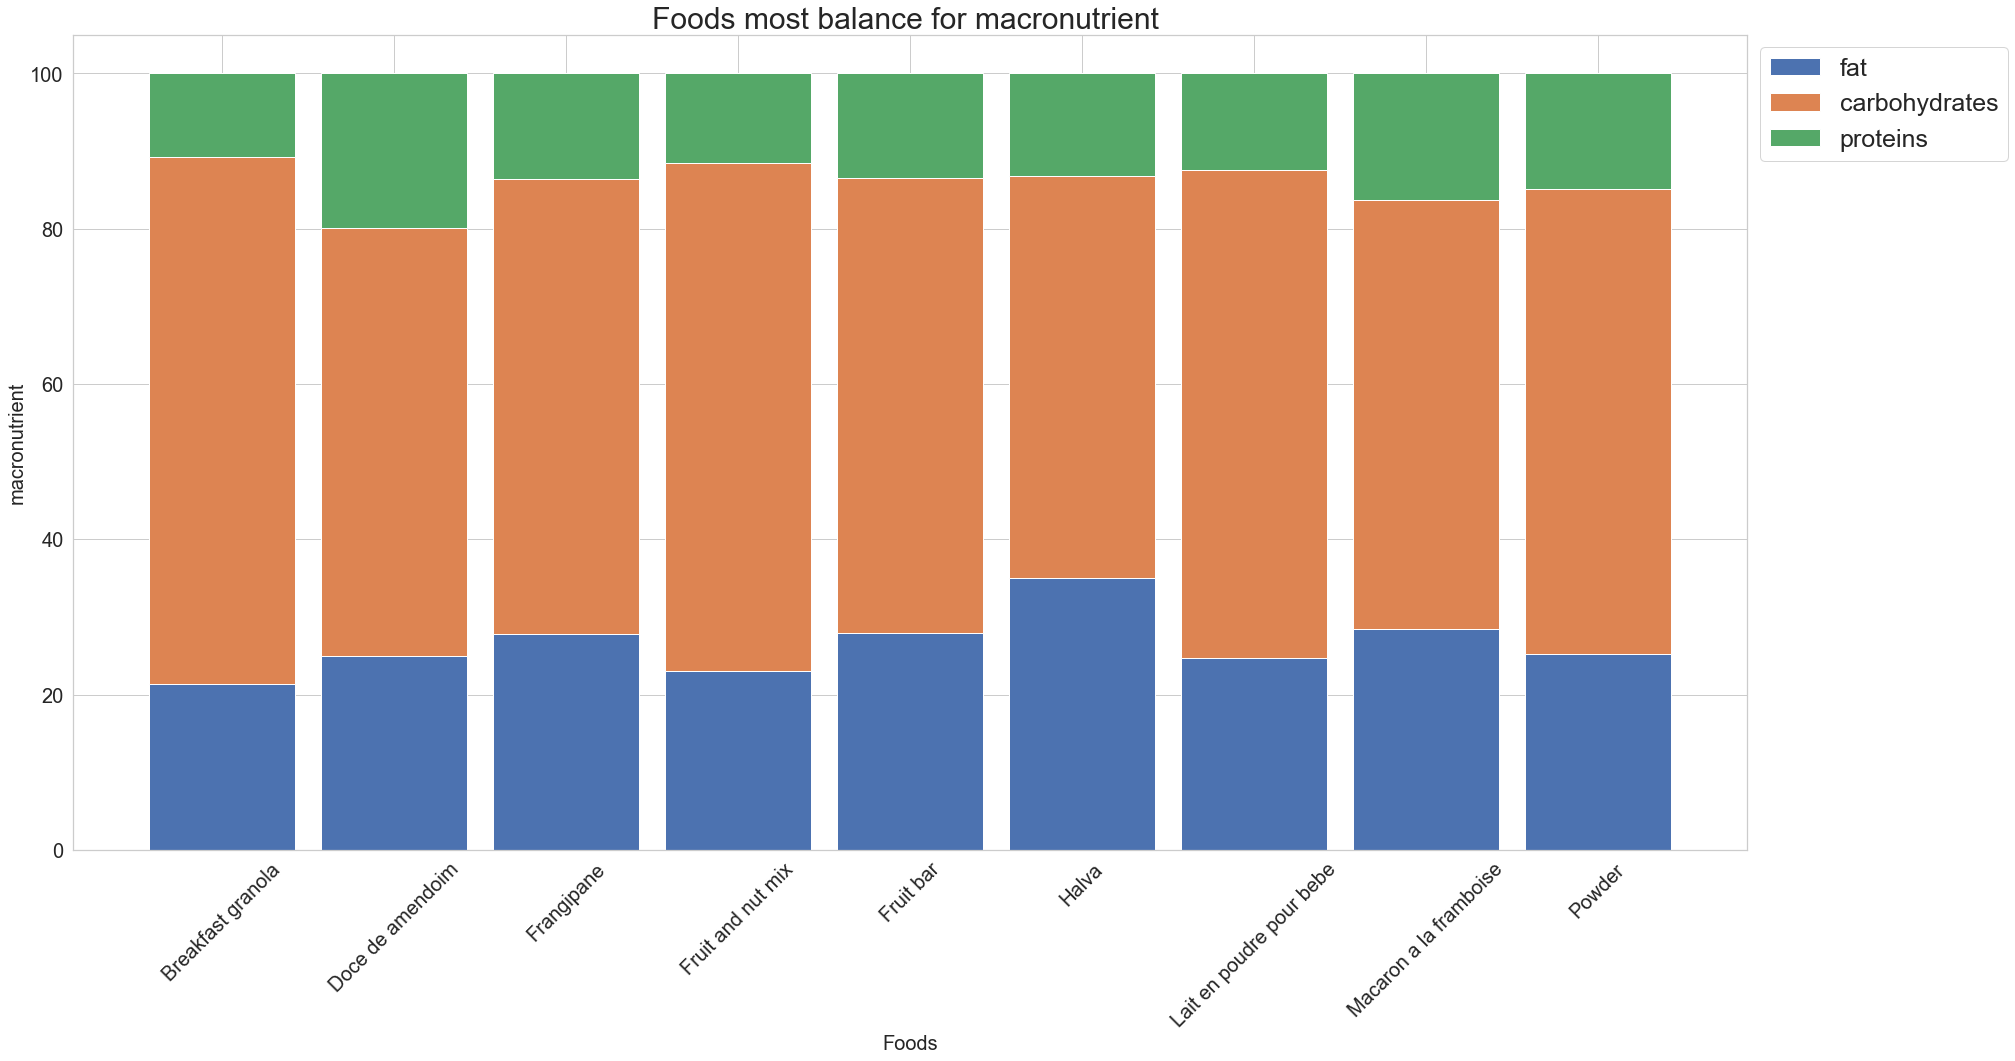

In [47]:
from matplotlib import rc

r = [0,1,2,3,4,5,6,7,8]
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(df['fat_100g'], df['carbohydrates_100g'], df['proteins_100g'])]
bBars = [i / j * 100 for i,j in zip(df['fat_100g'], totals)]
orangeBars = [i / j * 100 for i,j in zip(df['carbohydrates_100g'], totals)]
gBars = [i / j * 100 for i,j in zip(df['proteins_100g'], totals)]


fig, ax = plt.subplots(figsize = (30,15))
# plot
barWidth = 0.85
#names = ('granola','Doce de amendoim','Frangipane','Fruit and nut mix','Fruit bar','Halva','Lait en poudre pour bebe','Macaron a la framboise','Powder')
names = df.index

# Create green Bars
plt.bar(r, bBars, edgecolor='white', width=barWidth, label="fat")
# Create orange Bars
plt.bar(r, orangeBars, bottom=bBars, edgecolor='white', width=barWidth, label="carbohydrates")
# Create blue Bars
plt.bar(r, gBars, bottom=[i+j for i,j in zip(bBars, orangeBars)], edgecolor='white', width=barWidth, label="proteins")
 
# Custom x axis
plt.xticks(r, names, size = 20, rotation=45)
plt.yticks(size = 20)
plt.xlabel("Foods", size = 20)
plt.ylabel("macronutrient", size = 20)

# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1, prop={'size': 25})
plt.title("Foods most balance for macronutrient ", fontsize=30)
 
# Show graphic
plt.show()

I will look the macronutrient breakdown across different countries

In [48]:
df2 = df_b1

In [49]:
# Looking for the unique values in the column "countries"
df2.reset_index(inplace=True)
df2.drop(['index'], axis=1, inplace=True)
df2.head()

,categories_en,countries_en,fat_100g,carbohydrates_100g,proteins_100g
0,Plant based foods and beverages,Canada,12.00,23.00,22.00
1,Sugary snacks,Canada,14.40,54.10,4.79
2,Sugary snacks,Canada,10.70,38.70,3.33
3,Boulange,Canada,1.11,53.30,10.00
4,Meals,Canada,6.79,7.86,5.36


I will calculate the value of the mean for three macronutrients by country.

In [50]:
# Calculate mean by group 'countries_en'.

bd_c =df2.groupby('countries_en').mean()    #countries_en is the index after this line. 

# Column with the Total sum of the macronutrients
bd_c['Total']= bd_c['fat_100g']+bd_c['carbohydrates_100g']+bd_c['proteins_100g']

# drop those that the macronutrients might be 0.

bd_c = bd_c[(bd_c.fat_100g>0)&(bd_c.carbohydrates_100g>0)&(bd_c.proteins_100g>0)]

# Creating column Countries to help us do the plot
bd_c['Countries'] = bd_c.index                    

# Adding a row with the mean of each column
bd_c.loc['MEAN'] = bd_c.mean()
bd_c['Countries'].fillna(value='MEAN', inplace=True)

bd_c1 = bd_c.loc[:,'fat_100g':'proteins_100g']

bd_c[bd_c['Countries'] == 'MEAN']

,fat_100g,carbohydrates_100g,proteins_100g,Total,Countries
countries_en,,,,,
MEAN,13.704225,35.206888,6.871319,55.782431,MEAN


###### The macronutrient breakdown by contries table:

In [51]:
bd_c1

,fat_100g,carbohydrates_100g,proteins_100g
countries_en,,,
Albania,8.171429,44.664286,10.307143
Algeria,21.142857,46.878571,7.328571
Andorra,8.972000,31.880000,9.558000
Argentina,7.971429,40.442857,4.801429
Armenia,49.000000,25.000000,8.700000
Aruba,17.300000,70.000000,8.000000
Australia,11.239609,28.141041,6.980857
Austria,11.670526,34.756842,7.425053
Belarus,3.350000,41.500000,6.350000


###### The macronutrient breakdown across different countries

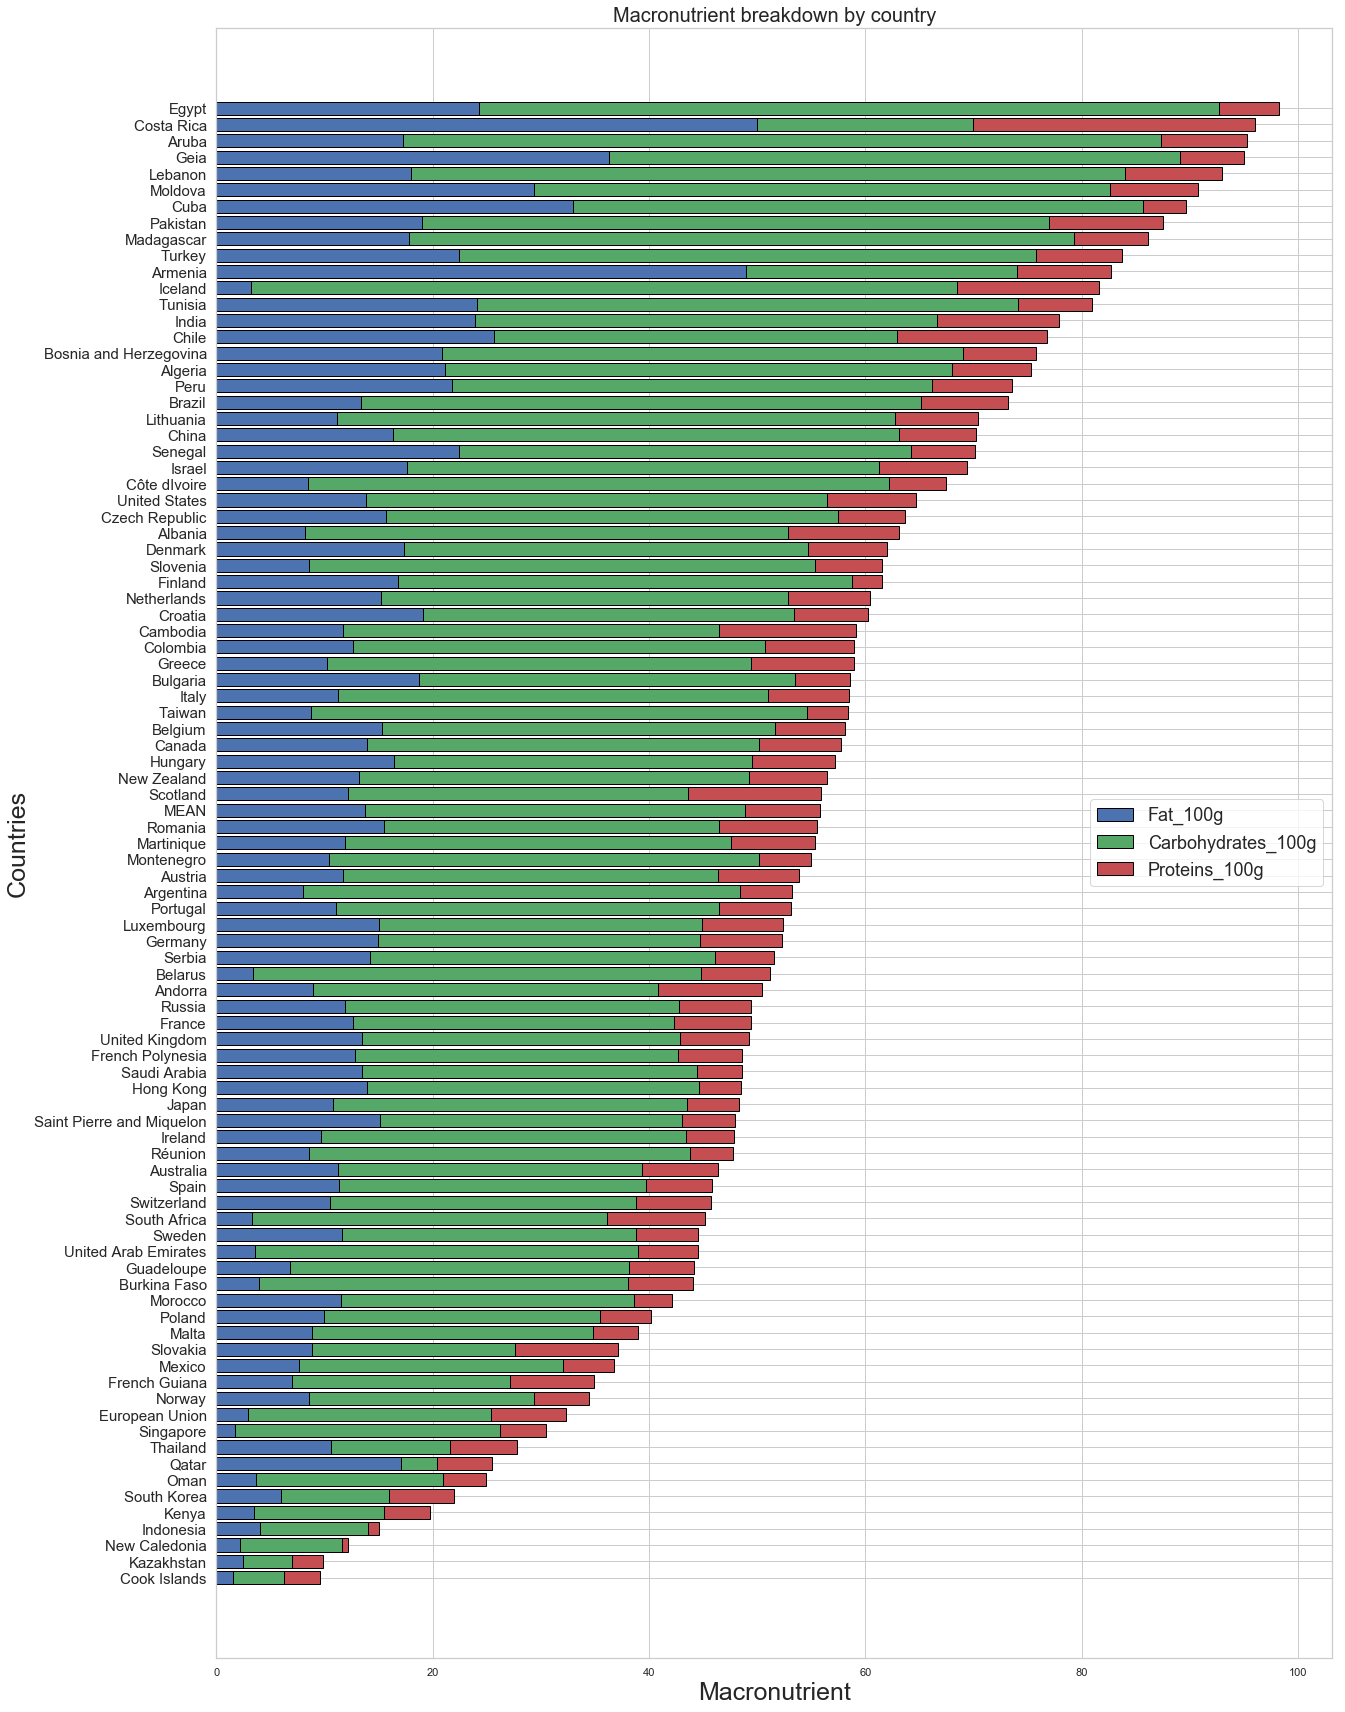

In [52]:
#y_cor = np.arange(91)
y_cor = range(len(bd_c.fat_100g))

db_a=bd_c.sort_values(by='Total')
Countries = db_a.Countries
Fat_100g = db_a.fat_100g
Carbohydrates_100g = db_a.carbohydrates_100g
Proteins_100g = db_a.proteins_100g

fig, ax = plt.subplots(figsize = (20,30))
plt.barh(y_cor, Fat_100g , edgecolor='black', color='b', label='Fat_100g')
plt.barh(y_cor, Carbohydrates_100g , edgecolor='black',color='g', left=Fat_100g, label='Carbohydrates_100g')
plt.barh(y_cor, Proteins_100g , edgecolor='black',color='r', left=Fat_100g+Carbohydrates_100g, label='Proteins_100g')
plt.yticks(y_cor,Countries, size = 15)
plt.title('Macronutrient breakdown by country', fontsize=20)
plt.xlabel('Macronutrient',size = 25)
plt.ylabel('Countries',  size = 25)
plt.legend(loc='center right', prop={'size': 18})
#plt.xlim(0,11)
plt.show()

###### The macronutrient breakdown across different countries by Fats

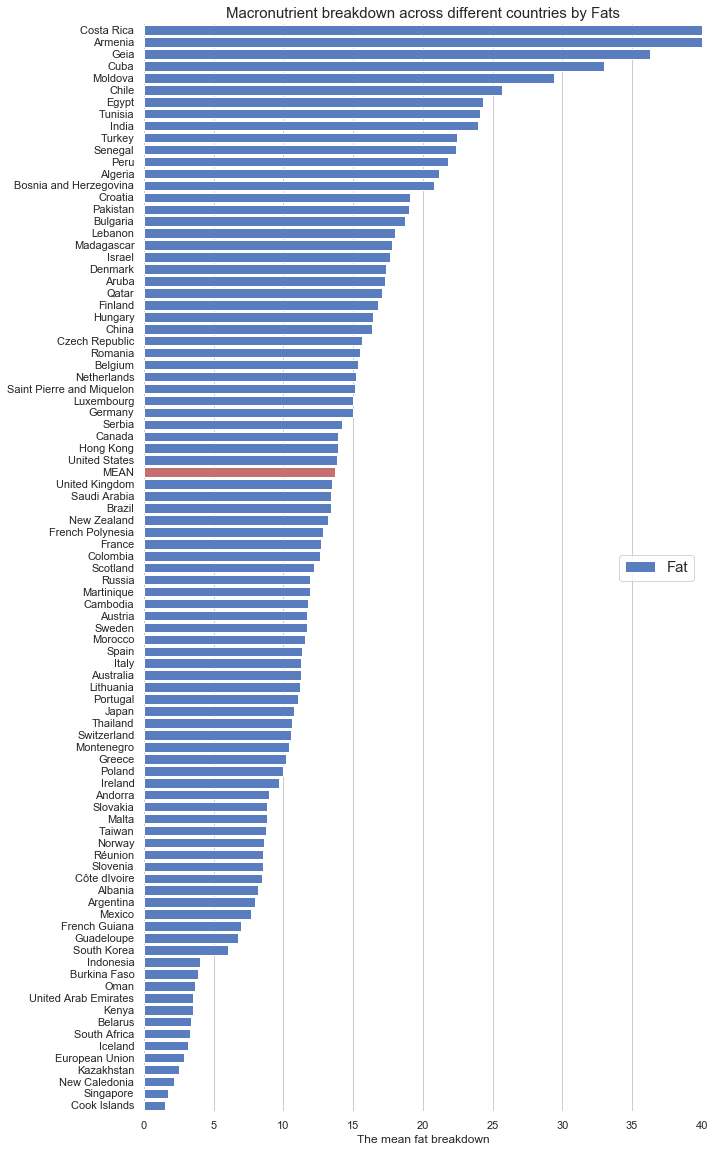

In [53]:
# Initialize the matplotlib figure

bd_f = bd_c.sort_values(by='fat_100g', ascending=False)


f, ax = plt.subplots(figsize=(10, 20))

# Sets different color for the row mean. List comprehensions
clrs = ['r' if i == "MEAN" else 'b' for i in bd_f.Countries ]

sns.set_color_codes("muted")
sns.barplot(x="fat_100g", y="Countries", data=bd_f,
            label="Fat", palette=clrs)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="center right", frameon=True, prop={'size': 15})
ax.set(xlim=(0,40), ylabel="",
       xlabel="The mean fat breakdown")
sns.despine(left=True, bottom=True)
plt.title('Macronutrient breakdown across different countries by Fats', fontsize=15)
plt.show()

###### The macronutrient breakdown across different countries by carbohydrates

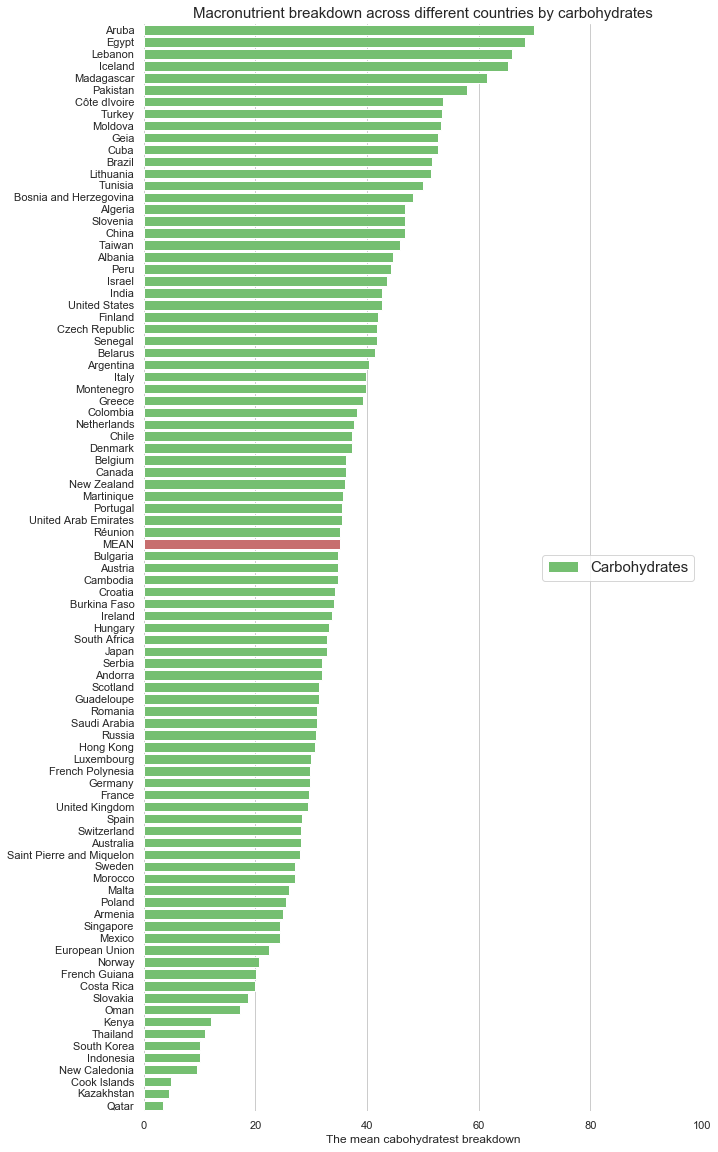

In [54]:
bd_car = bd_c.sort_values(by='carbohydrates_100g', ascending=False)

f, ax = plt.subplots(figsize=(10, 20))

# Sets different color for the row mean
clrs = ['r' if (y == "MEAN") else 'g' for y in bd_car.Countries ]

sns.set_color_codes("muted")
sns.barplot(x="carbohydrates_100g", y="Countries", data=bd_car,
            label="Carbohydrates", palette=clrs)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="center right", frameon=True, prop={'size': 15})
ax.set(xlim=(0,100), ylabel="",
       xlabel="The mean cabohydratest breakdown")
sns.despine(left=True, bottom=True)
plt.title('Macronutrient breakdown across different countries by carbohydrates', fontsize=15)
plt.show()

###### The macronutrient breakdown across different countries by proteins

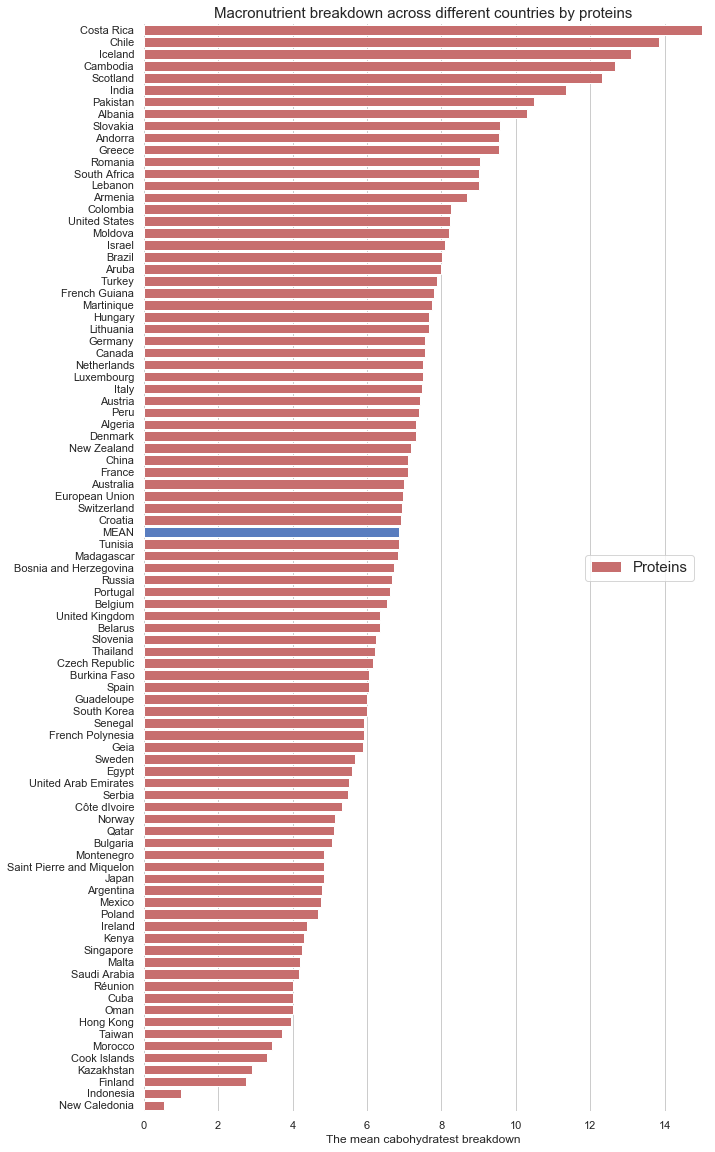

In [55]:
bd_pro = bd_c.sort_values(by='proteins_100g', ascending=False)

f, ax = plt.subplots(figsize=(10, 20))

# Sets different color for the row mean
clrs = ['b' if (y == "MEAN") else 'r' for y in bd_pro.Countries ]

sns.set_color_codes("muted")
sns.barplot(x="proteins_100g", y="Countries", data=bd_pro,
            label="Proteins", palette=clrs)

# Add a legend and informative axis label
ax.legend(ncol=2, loc="center right", frameon=True, prop={'size': 15})
ax.set(xlim=(0,15), ylabel="",
       xlabel="The mean cabohydratest breakdown")
sns.despine(left=True, bottom=True)
plt.title('Macronutrient breakdown across different countries by proteins', fontsize=15)
plt.show()

## C. Text data

You will filter and group your data based on the ingredients_text column. Your goal is to find the five most common ingredients.

In [56]:
data_c = df_a

In [57]:
#data_c.head()

I will check the number of null values in the column "ingredients_text"

In [58]:
n = data_c[['ingredients_text']].isnull().sum().sum()

print('The number of null values we have are', n)

The number of null values we have are 72134


I will drop all the null values in the column "ingredients_text".

In [59]:
# Cleaning Data
df_c3_i = data_c[['ingredients_text']]
df_c3_i.dropna(inplace=True)
df_c3_i.isnull().sum().sum()

0

I will explore the quality of information that there is in the "ingredientes_text" column.  I want to see of there is more than one ingredient in the column. 

In [60]:
df_c3_i.ingredients_text.head(10)

1     Bananas, vegetable oil (coconut oil, corn oil ...
2     Peanuts, wheat flour, sugar, rice flour, tapio...
3     Organic hazelnuts, organic cashews, organic wa...
4                                       Organic polenta
5     Rolled oats, grape concentrate, expeller press...
6                         Organic long grain white rice
7     Org oats, org hemp granola (org oats, evaporat...
8     Organic chocolate liquor, organic raw cane sug...
9     Organic expeller pressed, refined high oleic s...
10                                 Organic adzuki beans
Name: ingredients_text, dtype: object

The column needs to be split into different ingredients as there are some rows with more than one ingredient.  Also, there are some special characters that need to be removed.  

First, I am going to use the function "clean_point" created above to remove the special characters, and then I am going to split the data into different ingredients.  

In [61]:
ingredients = df_c3_i.ingredients_text
ingredients = clean_points(ingredients)

In [62]:
# Set the changes in the original DataFrame

df_c3_i.ingredients_text = ingredients
df_c3_i.head(15)

,ingredients_text
1,"Bananas, vegetable oil coconut oil, corn oil a..."
2,"Peanuts, wheat flour, Sugar, rice flour, tapio..."
3,"hazelnuts, anic cashews, anic walnuts almonds..."
4,polenta
5,"Rolled oats, grape concentrate, expeller press..."
6,long grain white rice
7,"Org oats, hemp granola oats, evaporated cane..."
8,"chocolate liquor, anic raw cane Sugar, anic c..."
9,"expeller pressed, refined high oleic sunflowe..."
10,adzuki beans


I have removed the special characters. Now I will create new columns of ingredientes to split those values where we can find more than one ingredient by row. 

In [63]:
# Spliting the ingrediente_text

df_c3s = df_c3_i
new = df_c3s['ingredients_text'].str.split(',', n=29, expand=True)

# split return a list of values. new is the list after the split. I will assign each value in the list to a new column.  
df_c3s['ingredient 1']= new[0]
df_c3s['ingredient 2']= new[1]
df_c3s['ingredient 3']= new[2]
df_c3s['ingredient 4']= new[3]
df_c3s['ingredient 5']= new[4]
df_c3s['ingredient 6']= new[5]
df_c3s['ingredient 7']= new[6]
df_c3s['ingredient 8']= new[7]
df_c3s['ingredient 9']= new[8]
df_c3s['ingredient 10']= new[9]
df_c3s['ingredient 11']= new[10]
df_c3s['ingredient 12']= new[11]
df_c3s['ingredient 13']= new[12]
df_c3s['ingredient 14']= new[13]
df_c3s['ingredient 15']= new[14]
df_c3s['ingredient 16']= new[15]
df_c3s['ingredient 17']= new[16]
df_c3s['ingredient 18']= new[17]
df_c3s['ingredient 19']= new[18]
df_c3s['ingredient 20']= new[19]
df_c3s['ingredient 21']= new[20]
df_c3s['ingredient 22']= new[21]
df_c3s['ingredient 23']= new[22]
df_c3s['ingredient 24']= new[23]
df_c3s['ingredient 25']= new[24]
df_c3s['ingredient 26']= new[25]
df_c3s['ingredient 27']= new[26]
df_c3s['ingredient 28']= new[27]
df_c3s['ingredient 29']= new[28]
df_c3s['ingredient 30']= new[29]


I will check how the ingrediente where splited into different columns and drop the column "ingredients_text" where there is more than one ingredient by row. 

In [64]:
df_3 = df_c3s


# Selecting just the columns we need. 

df_3 = df_c3s.loc[:,'ingredient 1':'ingredient 28']
df_3.head(10)

,ingredient 1,ingredient 2,ingredient 3,ingredient 4,ingredient 5,ingredient 6,ingredient 7,ingredient 8,ingredient 9,ingredient 10,ingredient 11,ingredient 12,ingredient 13,ingredient 14,ingredient 15,ingredient 16,ingredient 17,ingredient 18,ingredient 19,ingredient 20,ingredient 21,ingredient 22,ingredient 23,ingredient 24,ingredient 25,ingredient 26,ingredient 27,ingredient 28
1,Bananas,vegetable oil coconut oil,corn oil and or palm oil Sugar,natural banana flavor,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,Peanuts,wheat flour,Sugar,rice flour,tapioca starch,salt,leavening ammonium bicarbonate,baking soda,soy sauce Water,soybeans,wheat,salt,potato starch,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,hazelnuts,anic cashews,anic walnuts almonds,anic sunflower oil,sea salt,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,polenta,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,Rolled oats,grape concentrate,expeller pressed canola oil,sunflower seeds,almonds,walnuts oat bran,sesame seeds,cashews,natural vitamin e,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,long grain white rice,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,Org oats,hemp granola oats,evaporated cane juice,expeller pressed canola oil,crispy rice brown rice flour,evaporated cane juice,molasses,sea salt,flax seeds,oat solids,hemp seeds,raisins,dates,almonds,hazelnuts,coconut,sunflower seeds,pumpkin seeds,flax seeds,corn flakes corn meal,grape and or pear juice concentrate,sea salt,quinoa amaranth flakes corn meal,yellow corn flour,evaporated cane juice,flax,buckwheat flour,quinoa
8,chocolate liquor,anic raw cane Sugar,anic cocoa butter,anic unrefined whole cane Sugar,anic ground vanilla beans,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
9,expeller pressed,refined high oleic sunflower oil,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
10,adzuki beans,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


I will melt all the "ingredients" column into one in order to count the unique values and know the 5 must use ingredients. 

In [65]:
# Pivoting Table

df_3p = pd.melt(df_3)
df_3p.head()

,variable,value
0,ingredient 1,Bananas
1,ingredient 1,Peanuts
2,ingredient 1,hazelnuts
3,ingredient 1,polenta
4,ingredient 1,Rolled oats


In [66]:
df_3p['value'].replace('',np.nan,inplace=True)

In [67]:
# Deleting all the "None" from the column "value"

df_3p.dropna(inplace=True)

###### The five most common ingredients are:

In [68]:
df_3c =df_3p.groupby('value').count()
df_3c.sort_values(by='variable', ascending=False).head()

,variable
value,
salt,135049
Sugar,80578
Water,74186
citric acid,28992
folic acid,20032


## D. Time-series analysis

You will investigate more closely the created_datetime and last_modified_datetime. First, you will analyze the mean time difference between these two values. And second, you will analyze the mean number of created items per month over the timeline of the data. For the second question, you will also choose an appropriate method to visualize your findings.

In [69]:
data_c = df_a.copy()

In [70]:
# Looking at our original table.
# data_c.head()

I will select the column that I will work with. 

In [71]:
df_d = data_c.loc[:,'code':'product_name']
df_d.head()

,code,created_datetime,last_modified_datetime,product_name
0,0000000003087,2016-09-17 09:17:46,2016-09-17 09:18:13,Farine de blé noir
1,0000000004530,2017-03-09 14:32:37,2017-03-09 14:32:37,Banana Chips Sweetened (Whole)
2,0000000004559,2017-03-09 14:32:37,2017-03-09 14:32:37,Peanuts
3,0000000016087,2017-03-09 10:35:31,2017-03-09 10:35:31,Organic Salted Nut Mix
4,0000000016094,2017-03-09 10:34:13,2017-03-09 10:34:13,Organic Polenta


As I did in the last points I will look for the null values and drop them.  

In [72]:
df_d.isnull().sum()

code                         26
created_datetime             27
last_modified_datetime       26
product_name              17512
dtype: int64

In [73]:
df_d.dropna(inplace=True)

In [74]:
df_d.count()

code                      338488
created_datetime          338488
last_modified_datetime    338488
product_name              338488
dtype: int64

In [75]:
# Data types of the columns I am going to use.
df_d.dtypes

code                              object
created_datetime          datetime64[ns]
last_modified_datetime    datetime64[ns]
product_name                      object
dtype: object

Creating Delta time column called "timeDelta"

In [76]:
df_d['timeDelta']=(df_d['last_modified_datetime']-df_d['created_datetime'])
df_d = df_d[['code','created_datetime','last_modified_datetime','timeDelta','product_name']]
df_d.head()

,code,created_datetime,last_modified_datetime,timeDelta,product_name
0,0000000003087,2016-09-17 09:17:46,2016-09-17 09:18:13,00:00:27,Farine de blé noir
1,0000000004530,2017-03-09 14:32:37,2017-03-09 14:32:37,00:00:00,Banana Chips Sweetened (Whole)
2,0000000004559,2017-03-09 14:32:37,2017-03-09 14:32:37,00:00:00,Peanuts
3,0000000016087,2017-03-09 10:35:31,2017-03-09 10:35:31,00:00:00,Organic Salted Nut Mix
4,0000000016094,2017-03-09 10:34:13,2017-03-09 10:34:13,00:00:00,Organic Polenta


In [77]:
# Checking the data type of the new column. 
df_d.dtypes

code                               object
created_datetime           datetime64[ns]
last_modified_datetime     datetime64[ns]
timeDelta                 timedelta64[ns]
product_name                       object
dtype: object

Getting the mean of the new column. 

In [78]:
df_d['timeDelta'].describe()

count                      338488
mean     111 days 05:41:07.894173
std      288 days 08:12:34.695903
min               0 days 00:00:00
25%               0 days 00:00:00
50%               0 days 00:00:01
75%        8 days 19:23:19.750000
max            2033 days 13:40:59
Name: timeDelta, dtype: object

I will drop the outliers in the new column "timeDelta". I will use the function min_max_lim created before. 

In [79]:
outl_tDo = min_max_lim(df_d, df_d.timeDelta)

# outl_tDo.head()

In [80]:
outl_tDo.describe()

,timeDelta
count,335103
mean,95 days 22:38:23.708358
std,245 days 18:18:11.389779
min,0 days 00:00:00
25%,0 days 00:00:00
50%,0 days 00:00:01
75%,8 days 17:29:21.500000
max,1433 days 04:43:07


###### Mean time difference between "created_datetime" and "last_modified_datetime" is 95 days.

Analyze the mean number of created items per month over the timeline of the data.

In [81]:
# Changing index to created_datetime.

df_woob = outl_tDo.copy()
df_woob.set_index('created_datetime', inplace=True)

In [82]:
df_woob.head()

,code,last_modified_datetime,timeDelta,product_name
created_datetime,,,,
2016-09-17 09:17:46,0000000003087,2016-09-17 09:18:13,00:00:27,Farine de blé noir
2017-03-09 14:32:37,0000000004530,2017-03-09 14:32:37,00:00:00,Banana Chips Sweetened (Whole)
2017-03-09 14:32:37,0000000004559,2017-03-09 14:32:37,00:00:00,Peanuts
2017-03-09 10:35:31,0000000016087,2017-03-09 10:35:31,00:00:00,Organic Salted Nut Mix
2017-03-09 10:34:13,0000000016094,2017-03-09 10:34:13,00:00:00,Organic Polenta


In [83]:
# Grouping by months

prod_p_month = df_woob['product_name'].groupby(df_woob.index.month)
# prod_p_month.describe()

The month of March 2017 was the month with the most number of registered products in our database.

In [84]:
# Resampling our dataFrame counting the products by month
prod_p_month = (df_woob.resample('M')['code'].count())

top_10_pm=prod_p_month.sort_values(ascending=False).head(10) 
top_10_pm

created_datetime
2017-03-31    178458
2017-02-28     16506
2017-08-31      8020
2017-04-30      7392
2017-05-31      6670
2017-06-30      6291
2016-09-30      5634
2017-07-31      5574
2016-04-30      4981
2017-09-30      4598
Name: code, dtype: int64

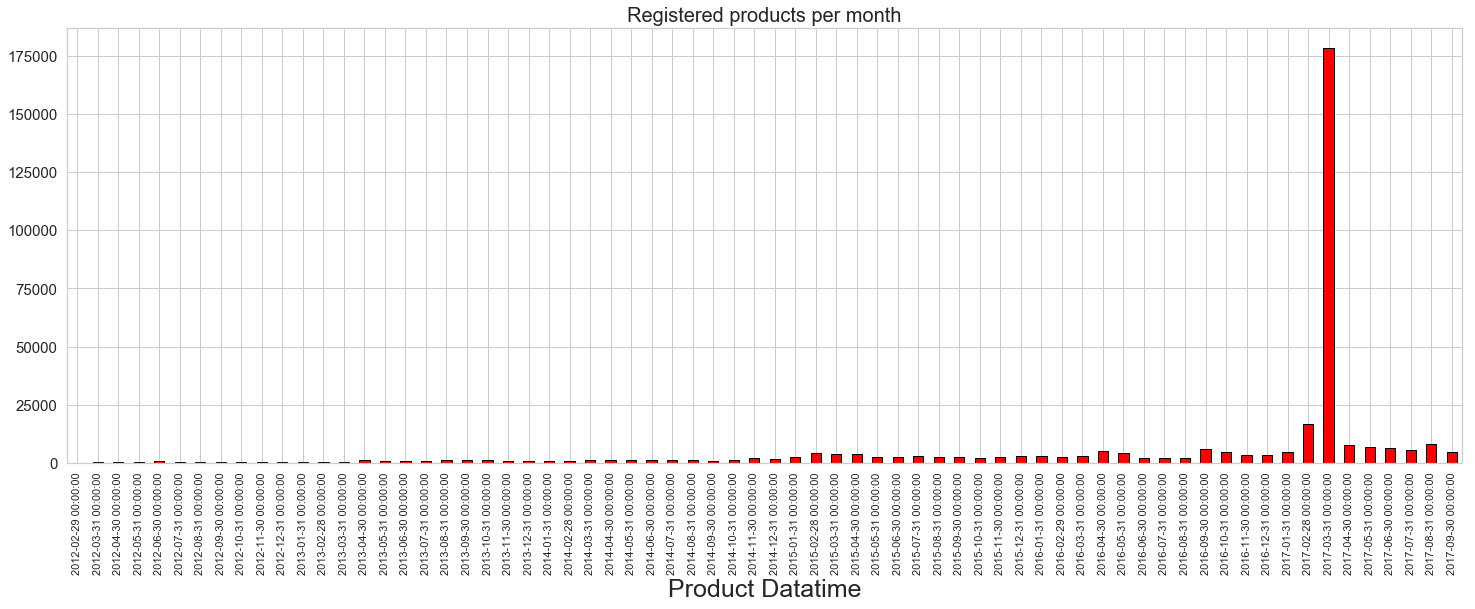

In [85]:
bar_plot=prod_p_month.plot.bar(figsize=(25,8), color='red', edgecolor = 'black')
bar_plot.set_title('Registered products per month', fontsize=20)
plt.xlabel('Product Datatime', size = 25)
plt.yticks(size = 15)
plt.show()

## E. Build a database

In [86]:
data_c1 = df_a.copy()

Restrict your data to 1000 entries and 5 columns of your choice

In [87]:
# Restricting to 1000 entries.

data_e = data_c1.sample(n=1000)
data_e.count()

code                                       1000
created_datetime                           1000
last_modified_datetime                     1000
product_name                                945
quantity                                    317
packaging                                   259
packaging_tags                              259
brands                                      924
brands_tags                                 924
categories                                  292
categories_tags                             292
categories_en                               292
countries_en                               1000
ingredients_text                            813
serving_size                                632
additives_n                                 813
additives                                   813
additives_tags                              492
additives_en                                492
ingredients_from_palm_oil_n                 813
ingredients_that_may_be_from_palm_oil_n 

I will chose 5 column to put in the database. 

In [88]:
df_products = data_e[['code', 'product_name','brands', 'countries_en', 'serving_size']]
df_information = data_e[['code', 'ingredients_text','fat_100g', 'carbohydrates_100g', 'proteins_100g']]

In [89]:
df_information.head()

,code,ingredients_text,fat_100g,carbohydrates_100g,proteins_100g
132515,0712810008120,"Enriched wheat flour (niacin, reduced iron, th...",6.67,66.67,13.33
250488,3456774797849,"Lait de coco reconstitué 48,3% (_lait_), eau, ...",9.70,22.00,1.60
27339,0031200270160,"Water, cranberry juice (water, cranberry juice...",0.00,0.80,0.00
241460,3350031569333,NaN,NaN,NaN,NaN
152560,0813997020018,Organic basil.,0.00,0.00,0.00


I will use the library sqlite3 to create an empty database.

In [90]:
db = sqlite3.connect("database_E.db")

###### • Create one or multiple tables, at least one of the tables should have a PRIMARY KEY

I will create the tables in the Database. 

In [91]:
query1= "CREATE TABLE product (code TEXT PRIMARY KEY, product_name TEXT, brands TEXT, countries_en TEXT, serving_size TEXT);"
query2= "CREATE TABLE Information (code TEXT PRIMARY KEY, ingredients_text TEXT, fat_100g FLOAT, carbohydrates_100g FLOAT, proteins_100g FLOAT);"

I am going to create a cursor object to run the queries.

In [92]:
cursor = db.cursor()

Checking that tables have been created correctly.

In [93]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# fetch all is to get the results from the query
results = cursor.fetchall()     
print(results)

[('product',), ('informations',)]


###### • Fill the database with your data

In [94]:
df_products.to_sql(name='product',con=db,if_exists='append',index=False)
df_information.to_sql(name='informations',con=db,if_exists='append',index=False)

###### • Run at least one query to demonstrate that it works correctly

In [95]:
def run_query(query):
    return pd.read_sql_query(query,db)

In [96]:
query ='''
SELECT product_name FROM product
INNER JOIN informations
ON product.code = informations.code
WHERE informations.fat_100g > 50
'''
run_query(query)

,product_name
0,Huilve vierge de noix
1,Extra Virgin Olive Oil
2,"Davis Lewis Orchards, Mixed Nuts"
3,"Sophia, Premium Sunflower Oil & Extra Virgin O..."
4,"Salted Mixed Nuts, Sea Salt"
5,Beurre gastronomique demi-sel
6,Beurre gastronomique demi-sel
7,Pecan Blend
8,Majonez delikates
9,Organic Extra Virgin Olive Oil


## F. Finding correlations

In [97]:
df_f = df_a

I will select the column I will use for this point.

In [98]:
df_f1 = df_f[['energy_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g',
                'proteins_100g','salt_100g','vitamin-a_100g','vitamin-c_100g','calcium_100g','iron_100g','cholesterol_100g',
                'trans-fat_100g','nutrition-score-fr_100g','nutrition-score-uk_100g']]

In [99]:
df_f1.count()

energy_100g                295367
fat_100g                   279497
saturated-fat_100g         263823
carbohydrates_100g         279220
sugars_100g                279186
fiber_100g                 220683
proteins_100g              294161
salt_100g                  289739
vitamin-a_100g             137706
vitamin-c_100g             141060
calcium_100g               141517
iron_100g                  140660
cholesterol_100g           144170
trans-fat_100g             143443
nutrition-score-fr_100g    254856
nutrition-score-uk_100g    254856
dtype: int64

Rename the columns with "-" to avoid errors. 

In [100]:
df_f2 = df_f1.rename(columns={'saturated-fat_100g': 'saturated_fat_100g','vitamin-a_100g': 'vitamin_a_100g', 'vitamin-c_100g': 'vitamin_c_100g',
                              'trans-fat_100g': 'trans_fat_100g','nutrition-score-fr_100g':'nutrition_score_fr_100g','nutrition-score-uk_100g': 'nutrition_score_uk_100g'})
df_f2.head()

,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,cholesterol_100g,trans_fat_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.0,0.0214,0.000,0.00129,0.018,0.0,14.0,14.0
2,1941.0,17.86,0.00,60.71,17.86,7.1,17.86,0.63500,0.0,0.0000,0.071,0.00129,0.000,0.0,0.0,0.0
3,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,NaN,NaN,0.143,0.00514,NaN,NaN,12.0,12.0
4,1552.0,1.43,NaN,77.14,NaN,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Look at the null values in the columns.

In [101]:
df_f2.isnull().sum()

energy_100g                 60660
fat_100g                    76530
saturated_fat_100g          92204
carbohydrates_100g          76807
sugars_100g                 76841
fiber_100g                 135344
proteins_100g               61866
salt_100g                   66288
vitamin_a_100g             218321
vitamin_c_100g             214967
calcium_100g               214510
iron_100g                  215367
cholesterol_100g           211857
trans_fat_100g             212584
nutrition_score_fr_100g    101171
nutrition_score_uk_100g    101171
dtype: int64

In [102]:
df_f2.dropna(subset = ['nutrition_score_fr_100g'], inplace=True)

In [103]:
df_f2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254856 entries, 1 to 356022
Data columns (total 16 columns):
energy_100g                254657 non-null float64
fat_100g                   238799 non-null float64
saturated_fat_100g         254657 non-null float64
carbohydrates_100g         238773 non-null float64
sugars_100g                254657 non-null float64
fiber_100g                 213205 non-null float64
proteins_100g              254657 non-null float64
salt_100g                  254657 non-null float64
vitamin_a_100g             132245 non-null float64
vitamin_c_100g             133164 non-null float64
calcium_100g               135814 non-null float64
iron_100g                  134815 non-null float64
cholesterol_100g           137273 non-null float64
trans_fat_100g             135593 non-null float64
nutrition_score_fr_100g    254856 non-null float64
nutrition_score_uk_100g    254856 non-null float64
dtypes: float64(16)
memory usage: 33.1 MB


I will replace the Nan values by 0, assuming that if there is a null(Nan) value is because is not an ingredient in the food of this row. 

In [104]:
df_f2['energy_100g'].fillna(value=0, inplace=True)
df_f2['fat_100g'].fillna(value=0, inplace=True)
df_f2['saturated_fat_100g'].fillna(value=0, inplace=True)
df_f2['carbohydrates_100g'].fillna(value=0, inplace=True)
df_f2['sugars_100g'].fillna(value=0, inplace=True)
df_f2['fiber_100g'].fillna(value=0, inplace=True)
df_f2['proteins_100g'].fillna(value=0, inplace=True)
df_f2['salt_100g'].fillna(value=0, inplace=True)
#df_f2['sodium_100g'].fillna(value=0, inplace=True)
df_f2['vitamin_a_100g'].fillna(value=0, inplace=True)
df_f2['vitamin_c_100g'].fillna(value=0, inplace=True)
df_f2['calcium_100g'].fillna(value=0, inplace=True)
df_f2['iron_100g'].fillna(value=0, inplace=True)
df_f2['cholesterol_100g'].fillna(value=0, inplace=True)
df_f2['trans_fat_100g'].fillna(value=0, inplace=True)
df_f2['nutrition_score_fr_100g'].fillna(value=0, inplace=True)
df_f2['nutrition_score_uk_100g'].fillna(value=0, inplace=True)


In [105]:
# Deleting rows where nutrition is 0

df_f2_t = df_f2[(df_f2.nutrition_score_fr_100g > 0)&(df_f2.nutrition_score_uk_100g > 0 )]

df_f2_t.count()

energy_100g                196306
fat_100g                   196306
saturated_fat_100g         196306
carbohydrates_100g         196306
sugars_100g                196306
fiber_100g                 196306
proteins_100g              196306
salt_100g                  196306
vitamin_a_100g             196306
vitamin_c_100g             196306
calcium_100g               196306
iron_100g                  196306
cholesterol_100g           196306
trans_fat_100g             196306
nutrition_score_fr_100g    196306
nutrition_score_uk_100g    196306
dtype: int64

I will drop the outliers I still have in the columns.

In [106]:
df_f3_t1 = df_f2.copy()

Dropping the outliers. 

In [107]:
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.energy_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.fat_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.saturated_fat_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.fiber_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.proteins_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.salt_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.vitamin_a_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.vitamin_c_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.calcium_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.iron_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.cholesterol_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.trans_fat_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.cholesterol_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.nutrition_score_fr_100g)
df_f3_t2 = min_max_lim(df_f3_t1, df_f3_t1.nutrition_score_uk_100g)

In [108]:
df_f3_t2.count()

energy_100g                228024
fat_100g                   228024
saturated_fat_100g         228024
carbohydrates_100g         228024
sugars_100g                228024
fiber_100g                 228024
proteins_100g              228024
salt_100g                  228024
vitamin_a_100g             228024
vitamin_c_100g             228024
calcium_100g               228024
iron_100g                  228024
cholesterol_100g           228024
trans_fat_100g             228024
nutrition_score_fr_100g    228024
nutrition_score_uk_100g    228024
dtype: int64

In [109]:
# Sample mean

sample_mean = df_f3_t2.nutrition_score_fr_100g.mean()
sample_mean2 = df_f3_t2.proteins_100g.mean()

In [110]:
print("The sample_mean for nutrition_score_fr_100g is {:,}".format(sample_mean))

The sample_mean for nutrition_score_fr_100g is 10.503512788127566


In [111]:
print("The sample_mean for proteins_100g is {:,}".format(sample_mean2))

The sample_mean for proteins_100g is 7.7157523501912095


In [112]:
# Confidence Intervals  

z = stats.norm.ppf(q = 0.975)
pop_std = df_f3_t2.nutrition_score_fr_100g.std()
margin_of_error = z * (pop_std / np.sqrt(176443))

confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

pop_std = df_f3_t2.proteins_100g.std()
margin_of_error2 = z * (pop_std / np.sqrt(176443))

confidence_interval2 = (sample_mean2 - margin_of_error2, sample_mean2 + margin_of_error2)

print("The sample mean for nutrition score fr is {:,}".format(sample_mean) + " and is inside of our confidence interval of {}".format(confidence_interval))


The sample mean for nutrition score fr is 10.503512788127566 and is inside of our confidence interval of (10.465858190863589, 10.541167385391542)


In [113]:
print("The sample mean for proteins is {:,}".format(sample_mean2) + "and is inside of our confidence interval of {}".format(confidence_interval2))

The sample mean for proteins is 7.7157523501912095and is inside of our confidence interval of (7.676831572792802, 7.7546731275896175)


In [114]:
cols_corr=['energy_100g','fat_100g','saturated_fat_100g','carbohydrates_100g','sugars_100g',
           'fiber_100g','proteins_100g','salt_100g','vitamin_a_100g','vitamin_c_100g',
           'calcium_100g','iron_100g','cholesterol_100g','trans_fat_100g','nutrition_score_fr_100g','nutrition_score_uk_100g']

corr_scores=df_f3_t1[cols_corr].corr()['nutrition_score_fr_100g'][0:19]
corr_scores

energy_100g                0.533731
fat_100g                   0.527930
saturated_fat_100g         0.617183
carbohydrates_100g         0.237924
sugars_100g                0.437558
fiber_100g                -0.001577
proteins_100g              0.100830
salt_100g                  0.007428
vitamin_a_100g            -0.003539
vitamin_c_100g            -0.007102
calcium_100g               0.012545
iron_100g                 -0.000827
cholesterol_100g           0.023803
trans_fat_100g             0.017160
nutrition_score_fr_100g    1.000000
nutrition_score_uk_100g    0.978636
Name: nutrition_score_fr_100g, dtype: float64

In [115]:
df_f3_t1.corr(method = "pearson")

,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,vitamin_a_100g,vitamin_c_100g,calcium_100g,iron_100g,cholesterol_100g,trans_fat_100g,nutrition_score_fr_100g,nutrition_score_uk_100g
energy_100g,1.000000,0.628529,0.546572,0.417215,0.431485,-0.001667,0.280290,-0.000823,-0.004458,-0.004990,5.903945e-03,0.005556,0.004823,1.430487e-02,0.533731,0.566768
fat_100g,0.628529,1.000000,0.651148,-0.012993,-0.021478,-0.001415,0.218732,-0.001920,0.000863,-0.005962,9.368501e-03,0.000351,0.018309,1.773631e-02,0.527930,0.566816
saturated_fat_100g,0.546572,0.651148,1.000000,-0.036739,0.141437,-0.001024,0.182652,-0.001924,-0.000514,-0.006750,1.353571e-02,-0.003008,0.026641,6.836303e-03,0.617183,0.641283
carbohydrates_100g,0.417215,-0.012993,-0.036739,1.000000,0.563756,-0.001349,-0.124734,0.001288,-0.003051,0.001425,-4.511301e-03,0.012036,-0.018281,1.124160e-02,0.237924,0.241373
sugars_100g,0.431485,-0.021478,0.141437,0.563756,1.000000,-0.000360,-0.212378,0.000668,-0.008699,0.000155,-4.419610e-03,0.005414,-0.010330,4.172920e-03,0.437558,0.425450
fiber_100g,-0.001667,-0.001415,-0.001024,-0.001349,-0.000360,1.000000,-0.001624,-0.000009,-0.000089,-0.000027,-5.917665e-05,-0.000027,-0.000076,-6.607032e-05,-0.001577,-0.001511
proteins_100g,0.280290,0.218732,0.182652,-0.124734,-0.212378,-0.001624,1.000000,0.000081,0.000791,-0.004927,3.268722e-02,0.004360,0.033563,-6.962530e-03,0.100830,0.131653
salt_100g,-0.000823,-0.001920,-0.001924,0.001288,0.000668,-0.000009,0.000081,1.000000,0.000867,0.000003,3.215191e-05,-0.000010,0.012773,-3.379447e-05,0.007428,0.007644
vitamin_a_100g,-0.004458,0.000863,-0.000514,-0.003051,-0.008699,-0.000089,0.000791,0.000867,1.000000,0.015217,3.029698e-03,0.000658,0.001971,3.143835e-04,-0.003539,-0.001347
vitamin_c_100g,-0.004990,-0.005962,-0.006750,0.001425,0.000155,-0.000027,-0.004927,0.000003,0.015217,1.000000,4.513559e-03,0.070298,-0.000351,-2.422441e-04,-0.007102,-0.006961


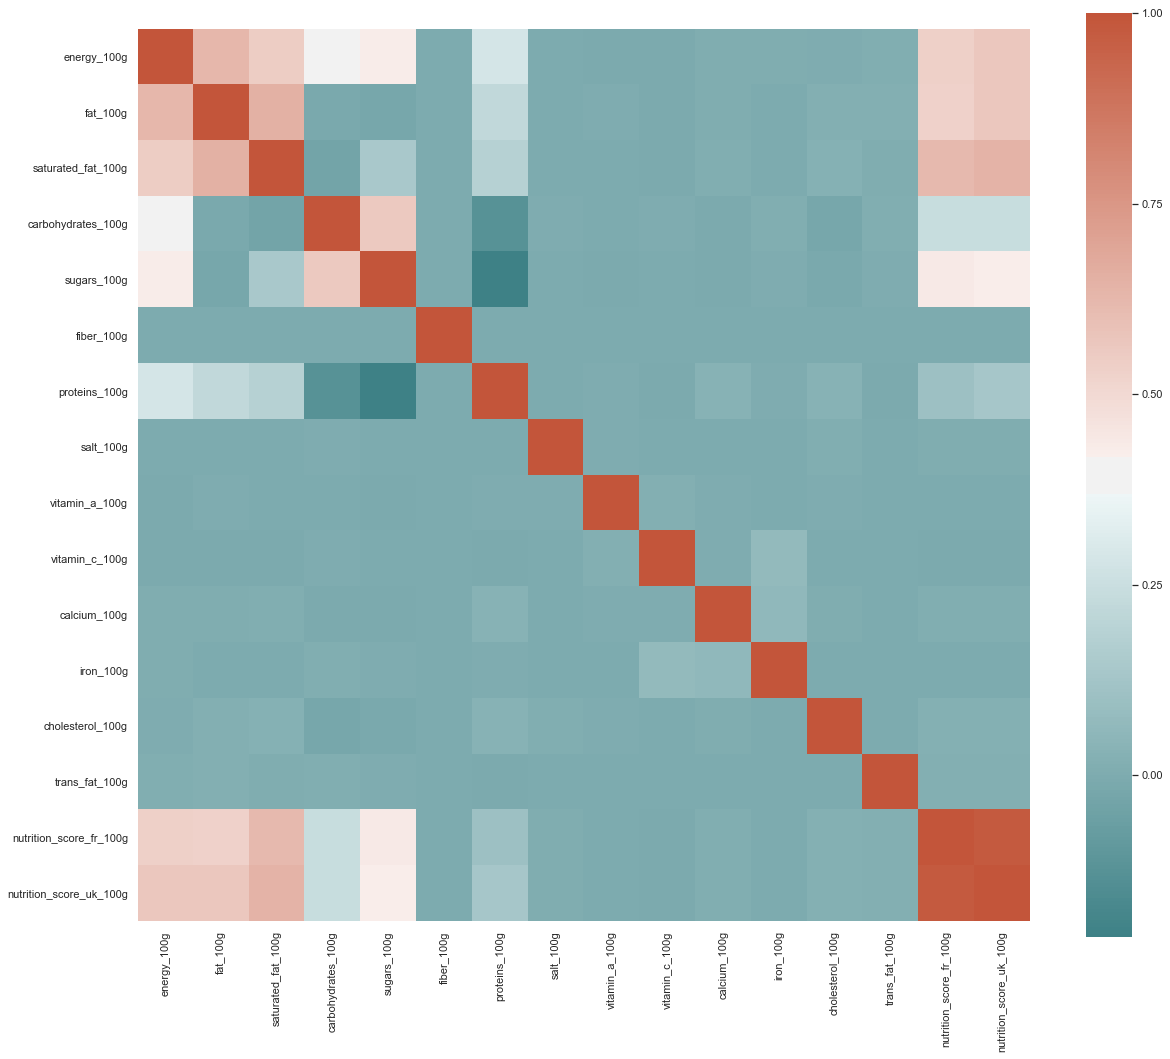

In [116]:
corr2 = df_f3_t1.corr(method = "pearson")

f, ax = plt.subplots(figsize=(20, 17))

sns.heatmap(corr2, mask=np.zeros_like(corr2, dtype=np.bool), 
            cmap=sns.diverging_palette(200, 20, as_cmap=True), square=True, ax=ax)
plt.show()

The trans fat does not apport anything to the nutrition score since this type of fat lower the levels of  HDL which is known as the good cholesterol. We find that the highest rank for nutrition score has 0 or close to 0 trans fat. Also, cholesterol, vitamin a and c have less impact on the nutrition score. Unlike the level of energy, fat and sugar that have a positive correlation with the nutrition score.